# <center> Speech Emotion Recognition - Part 2 </center>

# Table of Contents:
* ## [Introduction](#introduction)

* ## [Preparing the Data for Modelling:](#prep)

* ## [Modeling:](#model)

## Introduction: <a class="anchor" id="introduction"></a>

<b> This is part 2 of the notebook for the speech emotion recognition project, this part was ran on Google Colab. Part 1 can be found [here](https://github.com/MeshalAlamr/speech-emotion-recognition/blob/main/speech-emotion-recognition-1.ipynb) on the GitHub repo for the project. </b>

<b> At the end of part 1, we obtained the final dataframe which has 36,486 rows and 5 columns, including the extracted features which are on the fifth column, having 162 features for all audio files of the augmented data. </b>
    
<b> If you'd like to replicate the results from part 1 then the Pickle file for the final dataframe can be downloaded [here](https://drive.google.com/file/d/1iKRgJXRL2roULKN_BzrotG-bRqtflznK/view?usp=sharing) on Google Drive. </b>

### Part 2 will include:
* <b> Preparing the Data for Modelling </b>
* <b> Modelling </b>

### Importing necessarry libraries

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# data preperation for modelling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# modelling
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Dense, Embedding
from tensorflow.keras import optimizers
from keras.layers import Input, Flatten, Dropout, Activation
from keras.callbacks import ReduceLROnPlateau

# results / visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore", UserWarning)

### Loading the data obtained from Part 1

As the pickle file was saved with protocol 5 using Python 3.8, it need to be loaded into Python 3.6 which only supports protocol 4 (the same goes when using Google Colab which this notebook was ran on). If you were using Python 3.8 then the pickle file can be read through pandas just as the next cell shows.

In [5]:
!pip install pickle5

import pickle5 as pickle
with open("/content/gdrive/MyDrive/Colab_Notebooks/features.pkl", "rb") as fh:
    features_df = pickle.load(fh)

     |████████████████████████████████| 256 kB 5.3 MB/s 


In [7]:
# features_df = pd.read_pickle("features.pkl")
features_df

,Emotion,Path,Signal,Sampling Rate,Features
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.30078125, 0.7064923048019409, 0.75685280561..."
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.2712718822337963, 0.6749655604362488, 0.723..."
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.3073685257523148, 0.7161778211593628, 0.761..."
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.2793837e-08, -1.2744653e-08, 1.1805135e-08,...",22050,"[0.29731354890046297, 0.7431291937828064, 0.75..."
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.24427625868055555, 0.611600935459137, 0.698..."
...,...,...,...,...,...
36481,surprise,data/Savee/KL_su11.wav,"[0.0060994737, 0.008426055, 0.00677084, 0.0068...",22050,"[0.0181304431352459, 0.46761587262153625, 0.52..."
36482,surprise,data/Savee/KL_su12.wav,"[-0.005803811, -0.006557814, -0.003097208, -0....",22050,"[0.04212782118055555, 0.5079319477081299, 0.60..."
36483,surprise,data/Savee/KL_su13.wav,"[0.0007858629, 0.0010214511, 0.00036459867, 7....",22050,"[0.03166142216435185, 0.4451121687889099, 0.47..."
36484,surprise,data/Savee/KL_su14.wav,"[0.009449332, 0.00616582, -0.0054153656, -0.01...",22050,"[0.051423249421296294, 0.4757654070854187, 0.5..."


## Data Preperation for Modelling <a class="anchor" id="prep"></a>

In [8]:
features = pd.DataFrame(features_df['Features'].to_list())
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,0.300781,0.706492,0.756853,0.735217,0.731014,0.715155,0.667529,0.673754,0.722173,0.748969,0.739947,0.722562,0.685907,-646.141479,73.066620,0.403144,16.848043,9.805768,1.096762,-4.758567,-3.821855,-14.999225,-3.379040,0.610258,-3.628367,2.119565,-4.571883,0.182455,1.418681,-5.783636,-2.084638,-2.130159,-0.869078,0.002989,0.000002,0.000074,0.004800,0.027743,0.041586,0.023424,...,2.554807e-05,0.000016,0.000020,0.000030,0.000051,0.000065,0.000052,0.000110,0.000103,0.000061,0.000079,0.000041,0.000030,3.517429e-05,0.000049,0.000042,0.000027,0.000021,0.000014,0.000010,0.000008,0.000005,5.142100e-06,0.000006,0.000006,0.000009,6.674835e-06,4.080636e-06,2.743351e-06,3.518657e-06,3.818161e-06,4.319263e-06,3.298869e-06,2.153285e-06,2.286677e-06,5.131694e-06,8.065748e-06,5.375269e-06,2.270858e-06,1.642365e-07
1,0.271272,0.674966,0.723259,0.724594,0.681301,0.670643,0.674574,0.630036,0.680146,0.708276,0.735747,0.725877,0.703225,-634.959839,72.811478,-3.487027,20.697269,10.188319,-0.667841,-3.293634,-7.447817,-16.703850,-2.161060,-0.081074,-3.714514,0.273591,-4.517450,-1.117245,0.534380,-6.885534,-1.295200,-3.289555,0.756877,0.003227,0.000003,0.000106,0.004554,0.025026,0.068590,0.038717,...,6.318376e-05,0.000025,0.000015,0.000034,0.000074,0.000107,0.000066,0.000040,0.000048,0.000069,0.000083,0.000028,0.000028,3.218146e-05,0.000029,0.000042,0.000045,0.000034,0.000021,0.000020,0.000008,0.000007,6.080316e-06,0.000005,0.000009,0.000010,6.328713e-06,5.261341e-06,5.756651e-06,5.887367e-06,7.139188e-06,6.998011e-06,7.050108e-06,6.670963e-06,6.999257e-06,1.217880e-05,9.449916e-06,8.465686e-06,2.638513e-06,1.788902e-07
2,0.307369,0.716178,0.761089,0.758008,0.758388,0.734855,0.649470,0.630941,0.680735,0.738601,0.729218,0.645748,0.654602,-643.539185,74.687790,-1.654426,16.667934,5.185095,0.672246,-4.452597,-7.804122,-15.013509,-5.399968,-0.586950,-4.113428,1.270109,-4.779651,-3.539862,1.090911,-7.247006,-4.063982,-0.514474,0.192338,0.003666,0.000004,0.000080,0.004505,0.028807,0.065525,0.020931,...,1.500411e-04,0.000081,0.000079,0.000142,0.000282,0.000483,0.000374,0.000471,0.001011,0.000770,0.000388,0.000265,0.000197,1.277339e-04,0.000131,0.000116,0.000129,0.000154,0.000143,0.000083,0.000051,0.000027,4.260593e-05,0.000033,0.000026,0.000023,1.787946e-05,1.151506e-05,8.228151e-06,6.587115e-06,1.097085e-05,1.281951e-05,1.290721e-05,1.525549e-05,1.986458e-05,2.776636e-05,4.780266e-05,2.483219e-05,8.083573e-06,6.468821e-07
3,0.297314,0.743129,0.754720,0.747343,0.733528,0.726183,0.682260,0.676388,0.701887,0.736036,0.695124,0.684309,0.707974,-644.859009,69.573090,2.603384,16.992235,7.469007,2.995506,-2.625710,-7.836774,-13.316399,-4.526955,-0.048874,-2.389073,-0.242245,-3.906938,-2.942741,1.678184,-6.506072,-2.595646,-0.604484,-0.405804,0.003320,0.000003,0.000089,0.007546,0.036165,0.081686,0.017410,...,1.721186e-04,0.000176,0.000148,0.000183,0.000139,0.000345,0.000642,0.000509,0.000455,0.000402,0.000211,0.000198,0.000175,1.542786e-04,0.000183,0.000200,0.000124,0.000067,0.000067,0.000062,0.000025,0.000018,1.791678e-05,0.000038,0.000044,0.000027,2.694546e-05,3.007091e-05,2.133095e-05,1.577332e-05,1.624861e-05,1.986174e-05,1.858358e-05,2.485619e-05,8.028382e-05,4.014647e-05,3.653998e-05,3.107788e-05,1.029439e-05,6.636481e-07
4,0.244276,0.611601,0.698656,0.730102,0.686579,0.656195,0.657558,0.631722,0.669574,0.674671,0.699672,0.729654,0.628885,-652.754456,87.646660,2.713349,20.903515,10.069142,2.383482,-5.915830,-5.536599,-15.037767,-6.882812,0.394059,-4.395927,-0.156529,-4.558533,-1.396951,2.404289,-8.463616,-0.791653,-2.339244,-1.943409,0.002348,0.000003,0.000055,0.001818,0.016928,0.031705,0.034757,...,3.190938e-05,0.000009,0.000008,0.000013,0.000021,0.000029,0.000031,0.000024,0.000064,0.0000

In [9]:
X = np.array(features)
y = features_df["Emotion"]

### OneHotEncoding the labels and splitting the data

In [10]:
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [11]:
X.shape, y.shape

((36486, 162), (36486, 8))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

### Scaling the data

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [14]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

## Modelling <a class="anchor" id="model"></a>

In [15]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [16]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 20s 23ms/step - loss: 1.6447 - accuracy: 0.3369 - val_loss: 1.3526 - val_accuracy: 0.4612 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 9s 21ms/step - loss: 1.3607 - accuracy: 0.4525 - val_loss: 1.2403 - val_accuracy: 0.5001 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 9s 21ms/step - loss: 1.2693 - accuracy: 0.4905 - val_loss: 1.1763 - val_accuracy: 0.5318 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 9s 21ms/step - loss: 1.2150 - accuracy: 0.5133 - val_loss: 1.1498 - val_accuracy: 0.5364 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 9s 21ms/step - loss: 1.1734 - accuracy: 0.5308 - val_loss: 1.1097 - val_accuracy: 0.5561 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 9s 21ms/step - loss: 1.1439 - accuracy: 0.5456 - val_loss: 1.1125 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 9s 21ms/s

286/286 [==============================] - 2s 8ms/step - loss: 0.8225 - accuracy: 0.7214
Accuracy of our model on test data :  72.14426398277283 %


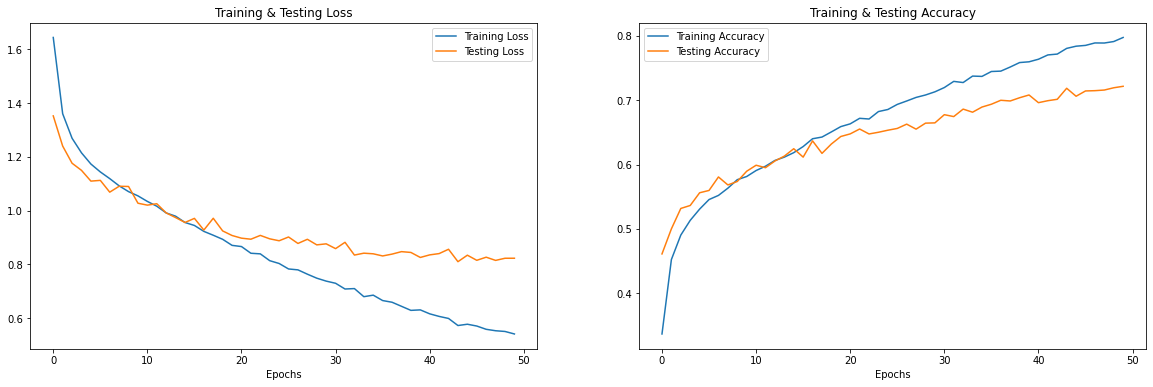

In [23]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [24]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_labels = encoder.inverse_transform(y_test)

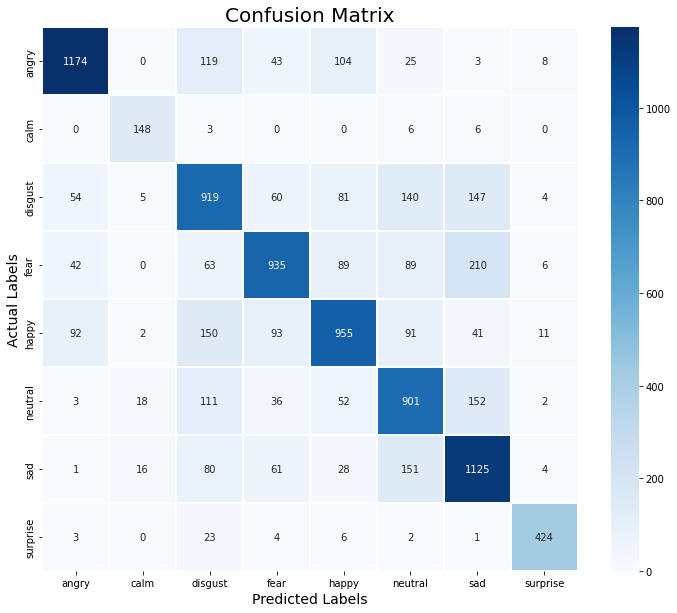

In [25]:
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [26]:
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

       angry       0.86      0.80      0.83      1476
        calm       0.78      0.91      0.84       163
     disgust       0.63      0.65      0.64      1410
        fear       0.76      0.65      0.70      1434
       happy       0.73      0.67      0.69      1435
     neutral       0.64      0.71      0.67      1275
         sad       0.67      0.77      0.71      1466
    surprise       0.92      0.92      0.92       463

    accuracy                           0.72      9122
   macro avg       0.75      0.76      0.75      9122
weighted avg       0.73      0.72      0.72      9122

